<a href="https://colab.research.google.com/github/MUHAMMAD-BILAL-S/CODSOFT_TASK_2/blob/main/Codsoft_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

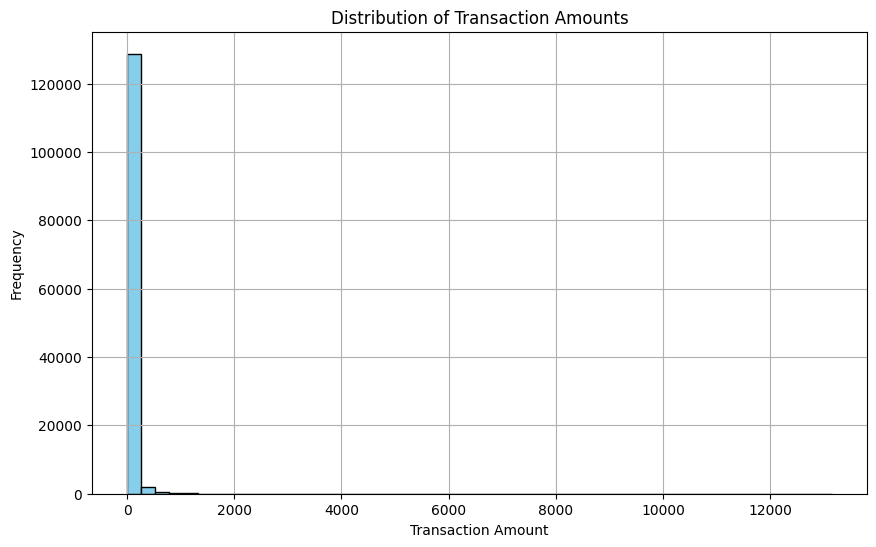

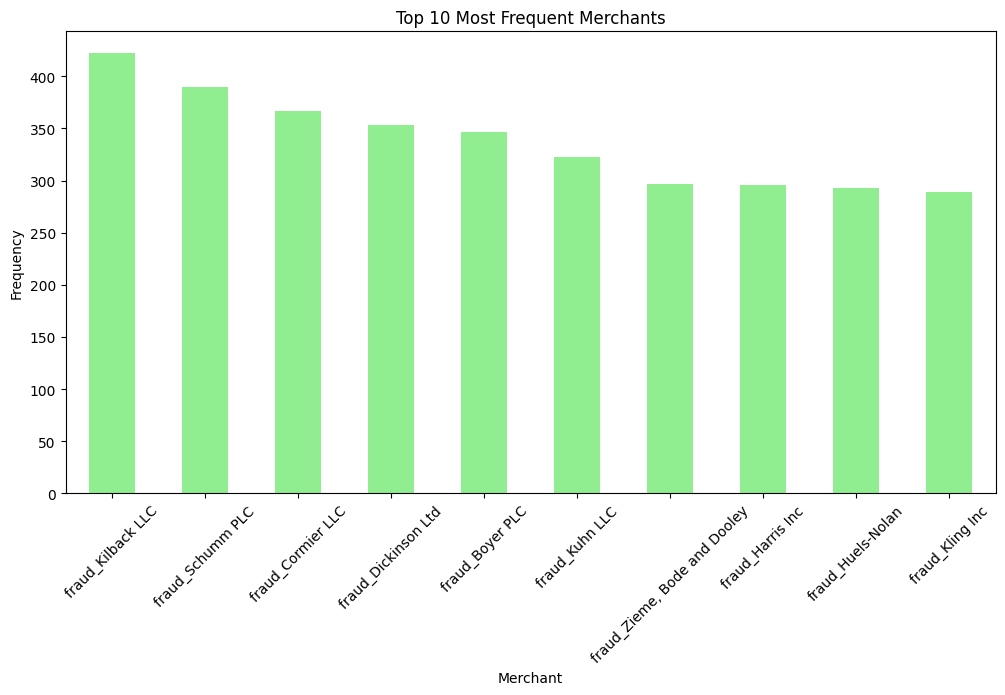

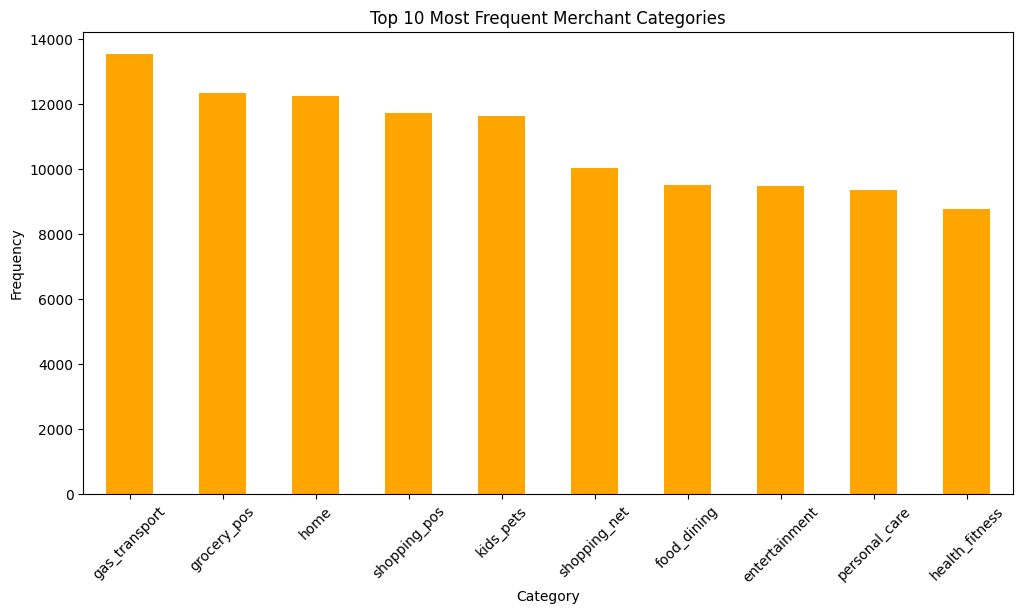

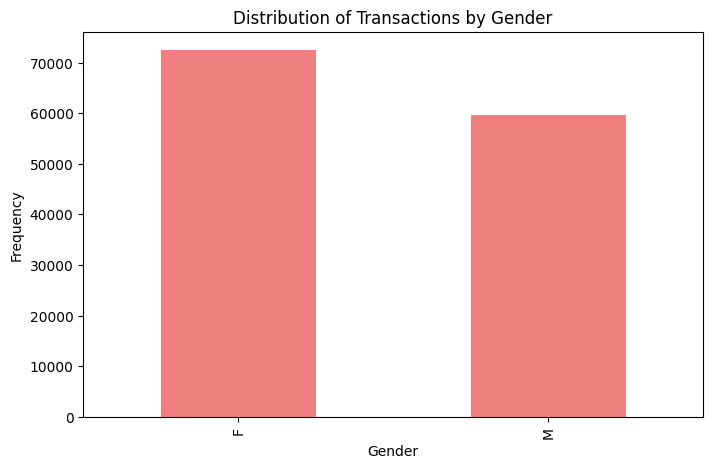

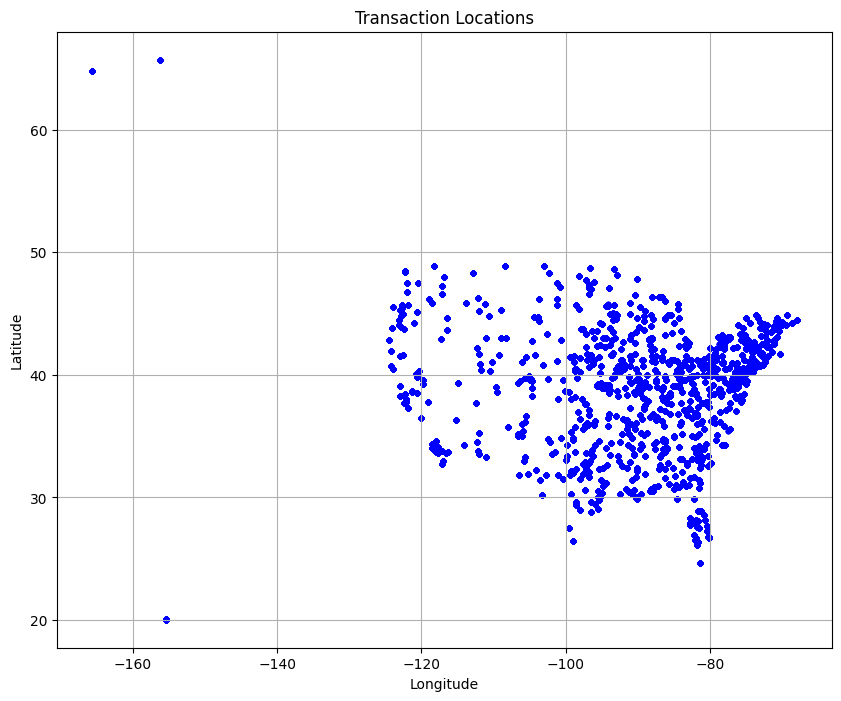

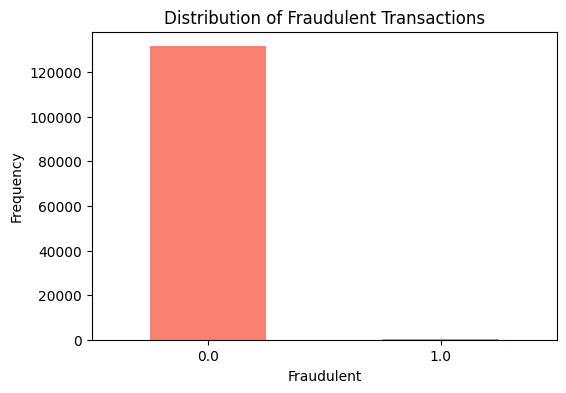

Logistic Regression
Accuracy: 0.9954572986069049
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26303
         1.0       0.00      0.00      0.00       113

    accuracy                           1.00     26416
   macro avg       0.50      0.50      0.50     26416
weighted avg       0.99      1.00      0.99     26416

Confusion Matrix:
[[26296     7]
 [  113     0]]
Decision Trees
Accuracy: 0.9951923076923077
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26303
         1.0       0.45      0.53      0.49       113

    accuracy                           1.00     26416
   macro avg       0.72      0.76      0.74     26416
weighted avg       1.00      1.00      1.00     26416

Confusion Matrix:
[[26229    74]
 [   53    60]]
Random Forests
Accuracy: 0.9969715324046032
Classification Report:
              precision    recall  f1-scor

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv(r'/content/fraudTest.csv')

# Transaction Amount (amt)
plt.figure(figsize=(10, 6))
data['amt'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Merchant
plt.figure(figsize=(12, 6))
data['merchant'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Frequent Merchants')
plt.xlabel('Merchant')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Merchant Category
plt.figure(figsize=(12, 6))
data['category'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Merchant Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Gender
plt.figure(figsize=(8, 5))
data['gender'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# Location
plt.figure(figsize=(10, 8))
plt.scatter(data['long'], data['lat'], c='blue', alpha=0.5, marker='.')
plt.title('Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Fraudulent Transactions
plt.figure(figsize=(6, 4))
data['is_fraud'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

data.dropna(inplace=True)

# Feature selection
X = data[['amt', 'lat', 'long', 'city_pop']]
y = data['is_fraud']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
dt_predictions = dt_classifier.predict(X_test_scaled)

# Random Forests
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

# Evaluate models
def evaluate_model(name, predictions):
    print(name)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

evaluate_model("Logistic Regression", lr_predictions)
evaluate_model("Decision Trees", dt_predictions)
evaluate_model("Random Forests", rf_predictions)
